This dataset is created for prediction of Graduate Admissions from an Indian perspective.

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

GRE Scores ( out of 340 ) TOEFL Scores ( out of 120 ) University Rating ( out of 5 ) Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) Undergraduate GPA ( out of 10 ) Research Experience ( either 0 or 1 ) Chance of Admit ( ranging from 0 to 1 ) Acknowledgements This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya. Here, Classification techniques are applied like Logistic Regression, Naive Bayes, Decision Tree,k nearest neighbours, Support Vector Machine, Random Forest and Adaboost.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [10]:
#dropping unnecesary col
data_graduate.drop(['Serial No.'], axis=1, inplace=True)

In [11]:
#check the column names
print(data_graduate.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [12]:
data_graduate.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [13]:
type(data_graduate)

pandas.core.frame.DataFrame

In [14]:
data_graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [15]:
data_graduate.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No null values are present

In [16]:
data_graduate.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [17]:
threshold = np.median(data_graduate['Chance of Admit '])
# Convert regression target variable to binary classes by taking median as the threshold value
chance_of_admit_binary = np.where(data_graduate['Chance of Admit '] < threshold, 0, 1)
chance_of_admit_binary

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [18]:
#dropping thr numerical output col
data_graduate.drop(['Chance of Admit '],axis=1,inplace=True)

In [19]:
#inserting the modified categorical col
data_graduate['Chance of Admit']=chance_of_admit_binary 
data_graduate.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
5,330,115,5,4.5,3.0,9.34,1,1
6,321,109,3,3.0,4.0,8.20,1,1
7,308,101,2,3.0,4.0,7.90,0,0
8,302,102,1,2.0,1.5,8.00,0,0
9,323,108,3,3.5,3.0,8.60,0,0


In [20]:
data_graduate.shape

(400, 8)

In [21]:
# to check if there is any duplcates
duplicate_rows=data_graduate[data_graduate.duplicated()]
print('no of duplicate rows:',duplicate_rows)

no of duplicate rows: Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit]
Index: []


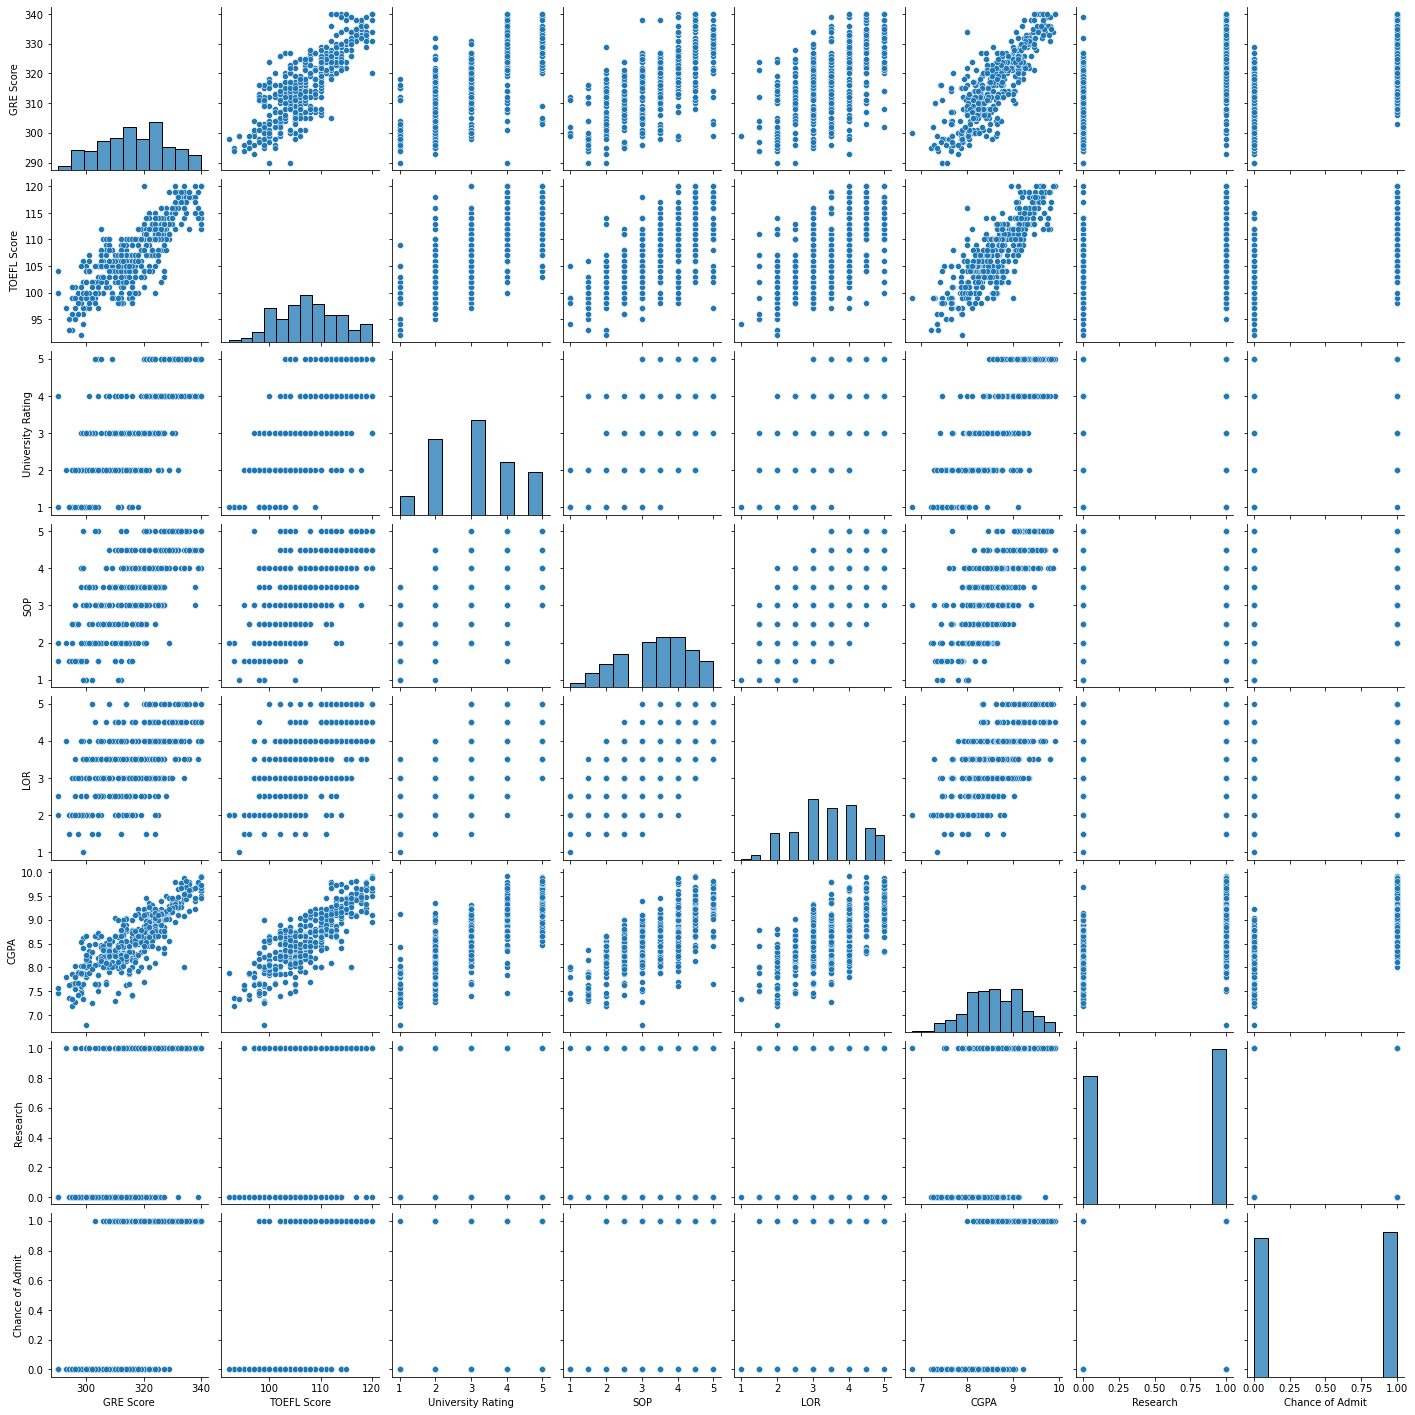

In [22]:
#pairplot
sns.pairplot(data_graduate)
plt.show()

Pairplot is used to analyze the relationships between multiple variables in a dataset. Variables like GRE score and TOEFL score, GRE score and CGPA, CGPA and TOEFL ,exhibit linear relationship among them.

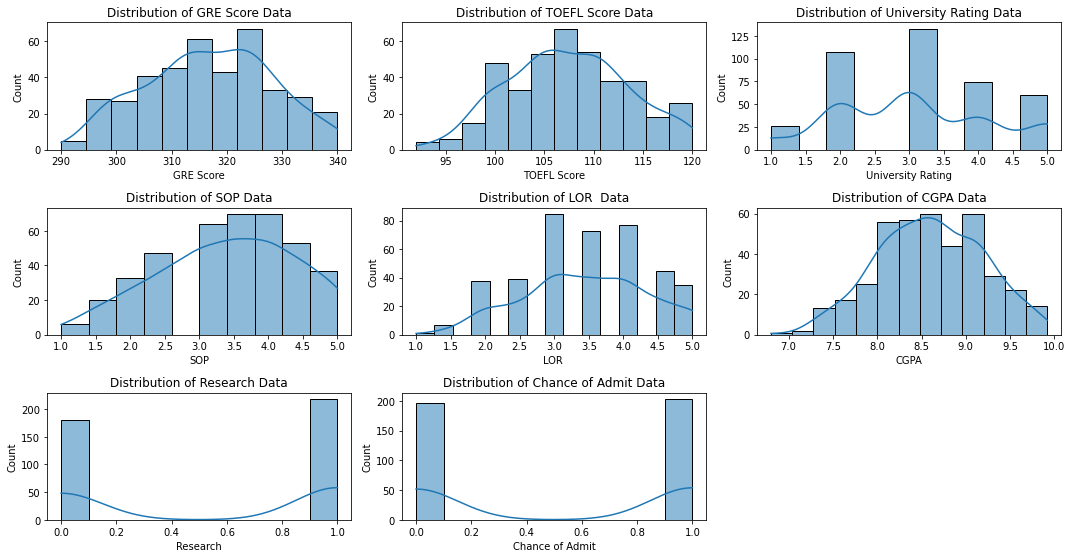

In [23]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(data_graduate.columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot((data_graduate[col]), kde=True)
    plt.tight_layout()

plt.show()


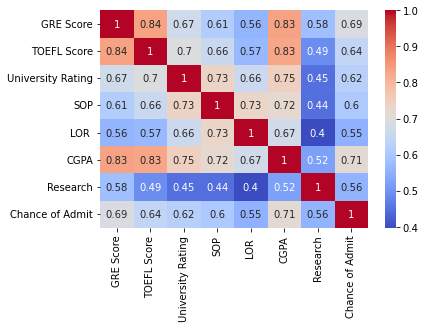

In [24]:
# Compute the correlation matrix
corr_matrix = data_graduate.corr()

# Create a correlation plot using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the correlation plot
plt.show()


Correlation with itself is always 1.Correlation between GRE score and TOEFL score is highest(0.84) then comes the correlation between GRE score and CGPA, TOEFL score and CGPA with value, 0.83.Lowest correlation is between research and LOR(0.4).

In [25]:
#test train split
from sklearn.model_selection import train_test_split

X = data_graduate.drop(['Chance of Admit'], axis=1)
y = data_graduate['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [26]:
#balanced dataset
#only accuracy will be sufficient in case of model evaluation
y.value_counts()

1    204
0    196
Name: Chance of Admit, dtype: int64

Results...
Logistic Regression : 0.8875


C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


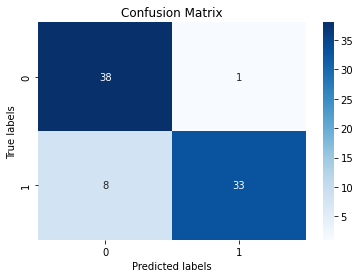

Naive Bayes: 0.9125


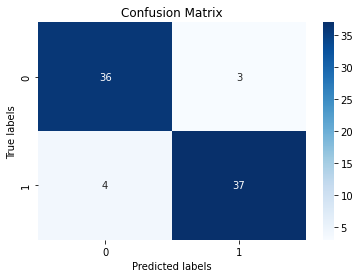

Decision Tree : 0.8125


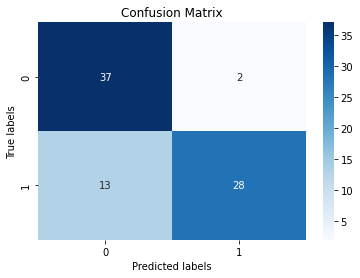

KNeighbours : 0.85


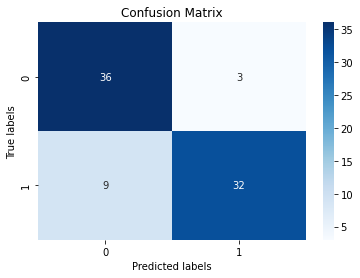

SVM : 0.8625


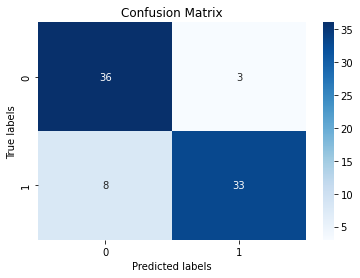

Random Forest: 0.8625


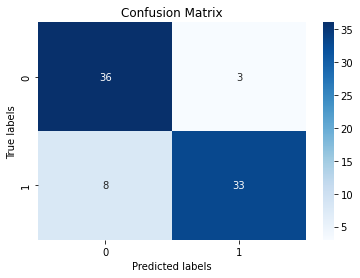

Adaboost: 0.8625


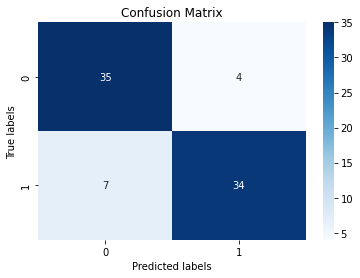

In [27]:
#classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

models = [['Logistic Regression :',LogisticRegression()],
           ['Naive Bayes:',  MultinomialNB()],
           ['Decision Tree :',DecisionTreeClassifier()],
           ['KNeighbours :', KNeighborsClassifier(n_neighbors=3)],
           ['SVM :', SVC()],
           ['Random Forest:', RandomForestClassifier(n_estimators=100)],
           ['Adaboost:',AdaBoostClassifier()]]
print("Results...")

model_df = {}


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, (accuracy_score(y_test, y_pred)))
    model_df[name] = accuracy_score(y_test, y_pred) 
    cm= confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # Add labels, title, and axis ticks to the plot
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    


Naive Bayes's accuracy(0.9125) is highest among all other classification algorithm. Therefore, the Naive Bayes classifier is performing best for this particular classification problem.